# References
[Tensorflow 1.2.0 Tutorial](https://www.tensorflow.org/versions/r1.2/get_started/get_started)

# TensorFlow Core tutorial

The canonical import statement

In [1]:
import tensorflow as tf

Computational graph

In [2]:
node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicity
print(node1, node2)

(<tf.Tensor 'Const:0' shape=() dtype=float32>, <tf.Tensor 'Const_1:0' shape=() dtype=float32>)


Computational graph doesn't show the values 3.0 and 4.0. Instead, they are the nodes that **would** produce 3.0 and 4.0, respectively.

To actually evaluate the nodes, we must run the computational graph within a **session**.<br>
A session encapsulates the control and state of the TensorFlow runtime.

In [3]:
sess = tf.Session()
print(sess.run([node1, node2]))

[3.0, 4.0]


We can build complicated computations with operation nodes.

In [4]:
node3 = tf.add(node1, node2)
print("node3: ", node3)
print("sess.run(node3): ",sess.run(node3))

('node3: ', <tf.Tensor 'Add:0' shape=() dtype=float32>)
('sess.run(node3): ', 7.0)


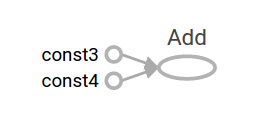

For the external input, we can use **placeholder**.

In [5]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b # + provides a shortcut for tf.add(a, b)

We can also input multiple values with **feed_dict** as you can see.

In [6]:
print(sess.run(adder_node, feed_dict={a: 3.0, b: 4.5}))
print(sess.run(adder_node, feed_dict={a: [1,3], b: [2,4]}))

7.5
[3. 7.]


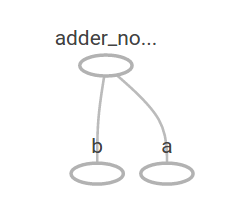

We can expand the computational graph with another operations.

In [7]:
add_and_triple = adder_node * 3.
print(sess.run(add_and_triple, feed_dict={a: 3, b:4.5}))

22.5


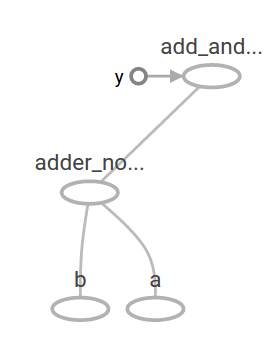

In [8]:
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W * x + b

tf.constant는 선언할 때 값이 초기화되지만,<br>
tf.Variable은 선언할 때 초기화되지 않는다. 반드시 명시적으로 다음과 같이 초기화해야 한다.<br>

In [9]:
init = tf.global_variables_initializer()
sess.run(init)

**init**은 텐서플로 프로그램의 서브 그래프들의 전역 variables를 초기화하는 중요한 핸들이다.<br>
sess.run(init)을 하기 전에는 variables는 초기화되지 않는다.

In [10]:
print(sess.run(linear_model, feed_dict={x:[1,2,3,4]}))

[0.         0.3        0.6        0.90000004]


모델을 만들었지만 모델 평가를 위해서는 정답지가 필요하다. y placeholder를 추가해서 확인해보자.<br>
모델의 값과 y의 값의 오차제곱을 다 더한 것을 성능지표인 **loss**로 삼자.

In [11]:
y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas) # 오차제곱을 다 더한다.
print(sess.run(loss, feed_dict={x:[1,2,3,4], y :[0,-1,-2,-3]}))

23.66


variables에 매뉴얼하게 값을 할당할 수 있다.

In [12]:
fixW = tf.assign(W, [-1.])
fixb = tf.assign(b,[1.])
sess.run([fixW, fixb])
print(sess.run(loss, feed_dict={x:[1,2,3,4], y:[0,-1,-2,-3]}))

0.0


지금까지 모델을 설정하고 loss를 구한 후, 매뉴얼하게 variables(paramters)를 변경하여 loss를 0으로 줄였지만
머신러닝에서는 파라미터들을 일일이 손으로 넣어주진 않는다. 자동적으로 찾지. 그래서 머신 **러닝**이라고 하는 것이다.
이는 tf.train API에서 상세하게 다룬다.

# tf.train API

텐서플로는 optimizer를 제공한다. <br>
optimizer는 머신러닝에 등장하는 개념으로 <br>
loss function이 최소가 되도록 파라미터들을 <br>
천천히 변화시키는(학습시키는) 녀석을 가리킨다. <br>

In [13]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

In [14]:
sess.run(init) # reset values to incorrect defaults.
for i in range(1000):
    sess.run(train, {x:[1,2,3,4],y:[0,-1,-2,-3]})
    
print(sess.run([W, b]))

[array([-0.9999969], dtype=float32), array([0.9999908], dtype=float32)]


자 이제 당신들은 머신러닝을 해냈습니다. 이것은 단순하지만 더 복잡한 모델을 설계할 때 텐서플로는 강력한 우군이 되어줄 것입니다.

# Complete program

The ccompleted trainable linear regression model is shown here:

In [15]:
import numpy as np
import tensorflow as tf

# Model parameters
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
# Model input and ouput
x = tf.placeholder(tf.float32)
linear_model = W * x + b
y = tf.placeholder(tf.float32)
# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)
# training data
x_train = [1,2,3,4]
y_train = [0,-1,-2,-3]
# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
for i in range(1000):
    sess.run(train, feed_dict={x:x_train, y:y_train})
    
# evaluate training accuracy
curr_W, curr_b, curr_loss = sess.run([W, b, loss], feed_dict={x:x_train, y:y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

W: [-0.9999969] b: [0.9999908] loss: 5.6999738e-11


참고로 학습 종료 후 loss는 아주아주 작은 값이다. 초기값이 랜덤으로 주어지기 때문에 예제코드의 결과값과 조금씩 차이가 날 수 있다.<br>
아래는 위 코드를 텐서보드로 시각화한 것이다.

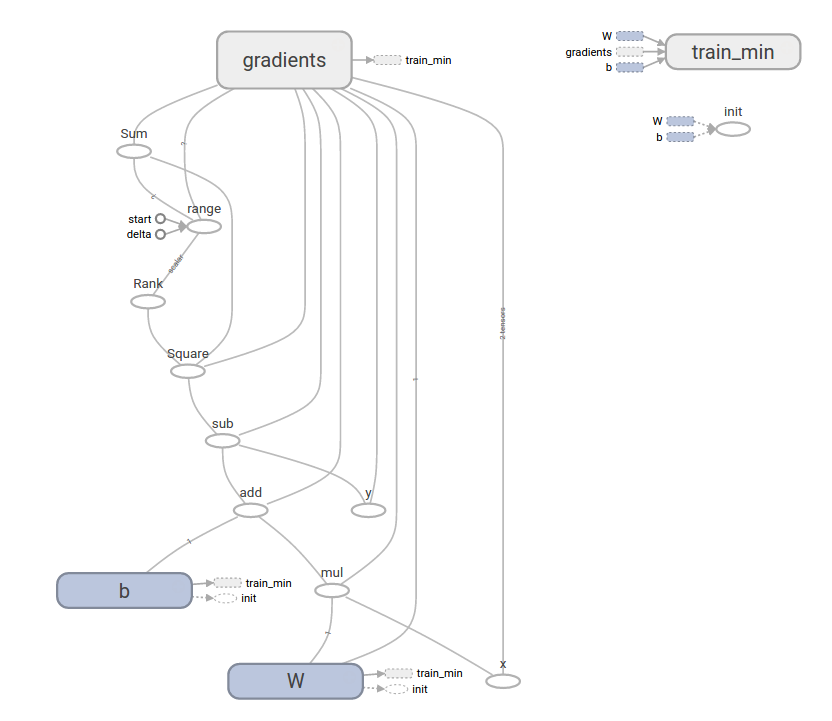